# Hotstar Data Analysis

We are going to analyze  the dataset which contains the Movies and Tv shows as of 2022. This Dataset is collected from Kaggle 

Tool are used to analyze the dataset `pandas`, `matplotlib`, `seaborn`, `opendataset`

In this Dataset we are going to do following:

- Selecting and downloading a dataset
- Data preparation and cleaning
- Exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

# Downloading the Dataset

We are going to download the dataset using opendataset library, which is used to download the dataset from the internet.

In [4]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [5]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/goelyash/disney-hotstar-tv-and-movie-catalog'

In [6]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinayakpandey8
Your Kaggle Key: ········


100%|██████████| 532k/532k [00:00<00:00, 85.4MB/s]

The dataset has been downloaded and extracted.

In [7]:
# Change this
data_dir = './disney-hotstar-tv-and-movie-catalog'

In [8]:
import os
os.listdir(data_dir)

['hotstar.csv']

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = 'hotstar_data_analysis'

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vinayakpandey372/hotstar-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vinayakpandey372/hotstar-data-analysis


'https://jovian.ai/vinayakpandey372/hotstar-data-analysis'

## Data Preparation and Cleaning

Before we analyze data we have to handle and clean missing value.

Data cleaning is the process to clean and handle data that we can derive some meaningful results.

In [13]:
import pandas as pd

In [14]:
hotstar_df = pd.read_csv(data_dir+ '/hotstar.csv')

In [15]:
hotstar_df

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Dacoit Babban Singh is on the loose in Kaligan...,Action,2007,U/A 13+,152.0,NaN,NaN,movie
1,1000164652,Niyogam,"A mediator between the deity and the devotees,...",Drama,1997,U/A 13+,101.0,NaN,NaN,movie
2,1000105823,Injakkadan Mathai & Sons,"Injakkadan Mathai and his sons, Roy and Thanka...",Action,1993,U/A 7+,122.0,NaN,NaN,movie
3,1000163530,Viyarppinte Vila,An impoverished landlord lives in past glory a...,Drama,1962,U,149.0,NaN,NaN,movie
4,1820041764,Ek Mulaqat,"Two strangers, Avi and Nikita meet at a party ...",Romance,2019,U,7.0,NaN,NaN,movie
...,...,...,...,...,...,...,...,...,...,...
6647,1260003841,Anandyatree,"Popular Marathi singers, Suresh Wadkar, Swapni...",Concert Film,2019,U,NaN,1.0,5.0,tv
6648,1260108360,Cook Like a Chef,"This innovative, ground-breaking series featur...",Food,2001,U/A 16+,NaN,1.0,39.0,tv
6649,1260067695,Star Kids - Daddy Daddy O My Daddy,Vijay TV stars and their adorable tiny tots ar...,Reality,2021,U/A 13+,NaN,1.0,1.0,tv
6650,1260025773,Disney's Recess,Recess portrays the lives of six fourth-grader...,Comedy,1997,U,NaN,3.0,65.0,tv


The dataset contains 6652 rows and 10 columns(we found there are some missing values in `running time`, `seasons` and `episodes` in the datasets.

In [16]:
hotstar_df.shape

(6652, 10)

We found 6652 rows and 10 columns

Now we are going to handle missing data.

Now Let's Check that how many missing values are contained in the datasets. 

In [17]:
hotstar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6652 non-null   int64  
 1   title         6652 non-null   object 
 2   description   6652 non-null   object 
 3   genre         6652 non-null   object 
 4   year          6652 non-null   int64  
 5   age_rating    6652 non-null   object 
 6   running_time  4419 non-null   float64
 7   seasons       2233 non-null   float64
 8   episodes      2233 non-null   float64
 9   type          6652 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 519.8+ KB


In the dataset we found that `seasons` and `episodes` columns contains 2233 `non-null` value.

In [18]:
hotstar_df.isnull().sum()

hotstar_id         0
title              0
description        0
genre              0
year               0
age_rating         0
running_time    2233
seasons         4419
episodes        4419
type               0
dtype: int64

In [19]:
hotstar_df.seasons.first_valid_index()

4419

In [20]:
hotstar_df.episodes.first_valid_index()

4419

In [21]:
hotstar_df.running_time.last_valid_index()

4418

In [22]:
hotstar_df.loc[4418:6651]

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
4418,1000230679,Yuntum,"Madly in love with his class mate Meera, music...",Romance,2018,U/A 13+,137.0,NaN,NaN,movie
4419,8182,Bhakton Ki Bhakti Mein Shakti,Can faith move mountains? Watch these stories ...,Drama,2016,U/A 13+,NaN,1.0,30.0,tv
4420,3012,Ajith Best Moments,Follow the journey of the immensely popular an...,Reality,2015,U,NaN,1.0,1.0,tv
4421,11,Saraswatichandra,"In this classic tale of love and heartbreak, S...",Romance,2013,U/A 13+,NaN,15.0,444.0,tv
4422,1260065351,Turner & Hooch,A Deputy Marshal inherits an unruly dog who he...,Comedy,2021,U/A 7+,NaN,1.0,12.0,tv
...,...,...,...,...,...,...,...,...,...,...
6647,1260003841,Anandyatree,"Popular Marathi singers, Suresh Wadkar, Swapni...",Concert Film,2019,U,NaN,1.0,5.0,tv
6648,1260108360,Cook Like a Chef,"This innovative, ground-breaking series featur...",Food,2001,U/A 16+,NaN,1.0,39.0,tv
6649,1260067695,Star Kids - Daddy Daddy O My Daddy,Vijay TV stars and their adorable tiny tots ar...,Reality,2021,U/A 13+,NaN,1.0,1.0,tv
6650,1260025773,Disney's Recess,Recess portrays the lives of six fourth-grader...,Comedy,1997,U,NaN,3.0,65.0,tv


In [23]:
hotstar_df.loc[:4418]

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Dacoit Babban Singh is on the loose in Kaligan...,Action,2007,U/A 13+,152.0,NaN,NaN,movie
1,1000164652,Niyogam,"A mediator between the deity and the devotees,...",Drama,1997,U/A 13+,101.0,NaN,NaN,movie
2,1000105823,Injakkadan Mathai & Sons,"Injakkadan Mathai and his sons, Roy and Thanka...",Action,1993,U/A 7+,122.0,NaN,NaN,movie
3,1000163530,Viyarppinte Vila,An impoverished landlord lives in past glory a...,Drama,1962,U,149.0,NaN,NaN,movie
4,1820041764,Ek Mulaqat,"Two strangers, Avi and Nikita meet at a party ...",Romance,2019,U,7.0,NaN,NaN,movie
...,...,...,...,...,...,...,...,...,...,...
4414,1000098596,Ningi Nela Naade,"Join Zihua, a physically challenged teenager, ...",Drama,2009,U/A 13+,88.0,NaN,NaN,movie
4415,1000104631,Ishq,When Ajay and Madhu's rich dads oppose their r...,Comedy,1997,U/A 13+,156.0,NaN,NaN,movie
4416,1770002602,Bouman Banbas,A king is considered to be unlucky by his subj...,Drama,1998,U/A 7+,161.0,NaN,NaN,movie
4417,1770021193,Will Ferrell: You're Welcome America. A Final ...,Discover Will Ferrell in his heralded Broadway...,Standup Comedy,2018,A,91.0,NaN,NaN,movie


Here we found that first valid index of `seasons`and `episode` is 4419 because the movies list ends at 4418 and tv shows started from 4419. 
Then we can place 0 at the `NaN`because the movies don't have episode and seasons. And we have to place 0 at running time of tv shows because if we fill the sum value of episode and season then the most duration then in tv shows or movies, tv shows will rank higher in most duration.

Let's make the copy of dataframe that original dataframe does not affect the change.

In [24]:
hotstar_new_df = hotstar_df.copy()

In [25]:
hotstar_new_df

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Dacoit Babban Singh is on the loose in Kaligan...,Action,2007,U/A 13+,152.0,NaN,NaN,movie
1,1000164652,Niyogam,"A mediator between the deity and the devotees,...",Drama,1997,U/A 13+,101.0,NaN,NaN,movie
2,1000105823,Injakkadan Mathai & Sons,"Injakkadan Mathai and his sons, Roy and Thanka...",Action,1993,U/A 7+,122.0,NaN,NaN,movie
3,1000163530,Viyarppinte Vila,An impoverished landlord lives in past glory a...,Drama,1962,U,149.0,NaN,NaN,movie
4,1820041764,Ek Mulaqat,"Two strangers, Avi and Nikita meet at a party ...",Romance,2019,U,7.0,NaN,NaN,movie
...,...,...,...,...,...,...,...,...,...,...
6647,1260003841,Anandyatree,"Popular Marathi singers, Suresh Wadkar, Swapni...",Concert Film,2019,U,NaN,1.0,5.0,tv
6648,1260108360,Cook Like a Chef,"This innovative, ground-breaking series featur...",Food,2001,U/A 16+,NaN,1.0,39.0,tv
6649,1260067695,Star Kids - Daddy Daddy O My Daddy,Vijay TV stars and their adorable tiny tots ar...,Reality,2021,U/A 13+,NaN,1.0,1.0,tv
6650,1260025773,Disney's Recess,Recess portrays the lives of six fourth-grader...,Comedy,1997,U,NaN,3.0,65.0,tv


In [26]:
hotstar_new_df['running_time'].fillna(0, inplace=True);
hotstar_new_df['seasons'].fillna(0, inplace=True);
hotstar_new_df['episodes'].fillna(0 ,inplace=True);

In [27]:
hotstar_new_df

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Dacoit Babban Singh is on the loose in Kaligan...,Action,2007,U/A 13+,152.0,0.0,0.0,movie
1,1000164652,Niyogam,"A mediator between the deity and the devotees,...",Drama,1997,U/A 13+,101.0,0.0,0.0,movie
2,1000105823,Injakkadan Mathai & Sons,"Injakkadan Mathai and his sons, Roy and Thanka...",Action,1993,U/A 7+,122.0,0.0,0.0,movie
3,1000163530,Viyarppinte Vila,An impoverished landlord lives in past glory a...,Drama,1962,U,149.0,0.0,0.0,movie
4,1820041764,Ek Mulaqat,"Two strangers, Avi and Nikita meet at a party ...",Romance,2019,U,7.0,0.0,0.0,movie
...,...,...,...,...,...,...,...,...,...,...
6647,1260003841,Anandyatree,"Popular Marathi singers, Suresh Wadkar, Swapni...",Concert Film,2019,U,0.0,1.0,5.0,tv
6648,1260108360,Cook Like a Chef,"This innovative, ground-breaking series featur...",Food,2001,U/A 16+,0.0,1.0,39.0,tv
6649,1260067695,Star Kids - Daddy Daddy O My Daddy,Vijay TV stars and their adorable tiny tots ar...,Reality,2021,U/A 13+,0.0,1.0,1.0,tv
6650,1260025773,Disney's Recess,Recess portrays the lives of six fourth-grader...,Comedy,1997,U,0.0,3.0,65.0,tv


Here 0 is replaced from nan value, it doesn't means that tv shows duration are 0. It means that either data is missing or there should be another columns especially for tv sshows which contains duration per episode.

In [28]:
hotstar_new_df.isnull().sum()

hotstar_id      0
title           0
description     0
genre           0
year            0
age_rating      0
running_time    0
seasons         0
episodes        0
type            0
dtype: int64

There are no nan value in `hotstar_new_df` dataframe.

In [29]:
hotstar_new_df.drop(columns="description",inplace=True)

Here we don't need the `description`colums so we removed because which contains cast of movies and TV shows, which is not necessary.

In [30]:
hotstar_new_df

,hotstar_id,title,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Action,2007,U/A 13+,152.0,0.0,0.0,movie
1,1000164652,Niyogam,Drama,1997,U/A 13+,101.0,0.0,0.0,movie
2,1000105823,Injakkadan Mathai & Sons,Action,1993,U/A 7+,122.0,0.0,0.0,movie
3,1000163530,Viyarppinte Vila,Drama,1962,U,149.0,0.0,0.0,movie
4,1820041764,Ek Mulaqat,Romance,2019,U,7.0,0.0,0.0,movie
...,...,...,...,...,...,...,...,...,...
6647,1260003841,Anandyatree,Concert Film,2019,U,0.0,1.0,5.0,tv
6648,1260108360,Cook Like a Chef,Food,2001,U/A 16+,0.0,1.0,39.0,tv
6649,1260067695,Star Kids - Daddy Daddy O My Daddy,Reality,2021,U/A 13+,0.0,1.0,1.0,tv
6650,1260025773,Disney's Recess,Comedy,1997,U,0.0,3.0,65.0,tv


`description` columns has been removed from datasets.

In [31]:
hotstar_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6652 non-null   int64  
 1   title         6652 non-null   object 
 2   genre         6652 non-null   object 
 3   year          6652 non-null   int64  
 4   age_rating    6652 non-null   object 
 5   running_time  6652 non-null   float64
 6   seasons       6652 non-null   float64
 7   episodes      6652 non-null   float64
 8   type          6652 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 467.8+ KB


Now data is cleaned so we can start our analysis.

In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vinayakpandey372/hotstar-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vinayakpandey372/hotstar-data-analysis


'https://jovian.ai/vinayakpandey372/hotstar-data-analysis'

## Exploratory Analysis and Visualization

As we cleaned our data so we can analyze through `Visualization`.

`Visualization` is the process in which we analyze the data in meaningful results.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [36]:
hotstar_new_df.describe()

,hotstar_id,year,running_time,seasons,episodes
count,6.652000e+03,6652.000000,6652.000000,6652.000000,6652.000000
mean,1.051591e+09,2011.317498,67.244738,0.908449,42.525857
std,4.876392e+08,11.990044,61.767364,3.172892,159.706856
min,3.000000e+00,1928.000000,0.000000,0.000000,0.000000
25%,1.000082e+09,2008.000000,0.000000,0.000000,0.000000
50%,1.260004e+09,2016.000000,79.000000,0.000000,0.000000
75%,1.260075e+09,2019.000000,128.000000,1.000000,6.000000
max,1.837059e+09,2022.000000,226.000000,73.000000,3871.000000


**1.--   Number of Movie and TV shows**

Let's see the number of Movies and TV Shows on Hotstar through Bar plot Which Give us more Insight that how many Movies and how many TV shows are on hotstar

In [37]:
count = hotstar_new_df.type.value_counts()
count

movie    4419
tv       2233
Name: type, dtype: int64

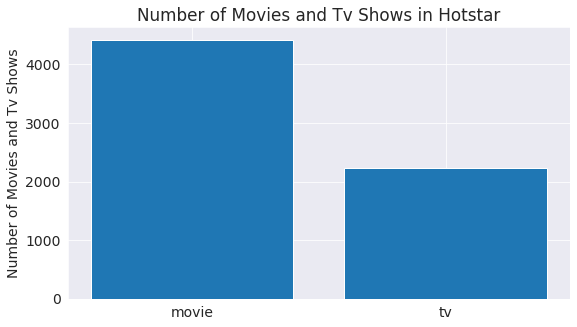

In [38]:
plt.title("Number of Movies and Tv Shows in Hotstar")
plt.ylabel("Number of Movies and Tv Shows")
plt.bar(count.index, count);

Here more than 4000 are movies and more 2000 TV Shows are shown in bar plot.

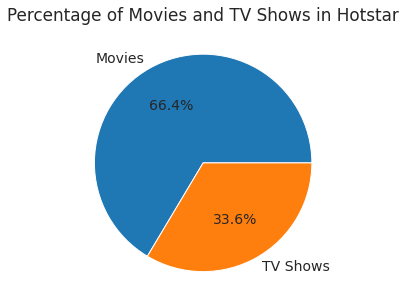

In [39]:
plt.title("Percentage of Movies and TV Shows in Hotstar")
plt.pie(count.values,labels=["Movies","TV Shows"],autopct="%1.1f%%");
#autopct enables you to display the percent value using Python string formatting

66.4% are movie and 33.6% are TV shows in the dataset

**2.-- Number of content added over the years**

Let's see the Number of content uploaded over years on Hotstar through `seaborn` `countplot` 

In [40]:
movie_count = hotstar_new_df[hotstar_new_df['type'] == "movie"]
tv_count = hotstar_new_df[hotstar_new_df['type'] == "tv"];

In [41]:
tv_count

,hotstar_id,title,genre,year,age_rating,running_time,seasons,episodes,type
4419,8182,Bhakton Ki Bhakti Mein Shakti,Drama,2016,U/A 13+,0.0,1.0,30.0,tv
4420,3012,Ajith Best Moments,Reality,2015,U,0.0,1.0,1.0,tv
4421,11,Saraswatichandra,Romance,2013,U/A 13+,0.0,15.0,444.0,tv
4422,1260065351,Turner & Hooch,Comedy,2021,U/A 7+,0.0,1.0,12.0,tv
4423,13874,Mouna Raagam 2,Drama,2017,U/A 13+,0.0,2.0,1278.0,tv
...,...,...,...,...,...,...,...,...,...
6647,1260003841,Anandyatree,Concert Film,2019,U,0.0,1.0,5.0,tv
6648,1260108360,Cook Like a Chef,Food,2001,U/A 16+,0.0,1.0,39.0,tv
6649,1260067695,Star Kids - Daddy Daddy O My Daddy,Reality,2021,U/A 13+,0.0,1.0,1.0,tv
6650,1260025773,Disney's Recess,Comedy,1997,U,0.0,3.0,65.0,tv


Here we found 2233 TV shows in the dataset

In [42]:
movie_count

,hotstar_id,title,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Action,2007,U/A 13+,152.0,0.0,0.0,movie
1,1000164652,Niyogam,Drama,1997,U/A 13+,101.0,0.0,0.0,movie
2,1000105823,Injakkadan Mathai & Sons,Action,1993,U/A 7+,122.0,0.0,0.0,movie
3,1000163530,Viyarppinte Vila,Drama,1962,U,149.0,0.0,0.0,movie
4,1820041764,Ek Mulaqat,Romance,2019,U,7.0,0.0,0.0,movie
...,...,...,...,...,...,...,...,...,...
4414,1000098596,Ningi Nela Naade,Drama,2009,U/A 13+,88.0,0.0,0.0,movie
4415,1000104631,Ishq,Comedy,1997,U/A 13+,156.0,0.0,0.0,movie
4416,1770002602,Bouman Banbas,Drama,1998,U/A 7+,161.0,0.0,0.0,movie
4417,1770021193,Will Ferrell: You're Welcome America. A Final ...,Standup Comedy,2018,A,91.0,0.0,0.0,movie


Here we found 4418 movies in the dataset

In [43]:
movie_count = movie_count.year.value_counts();
tv_count = tv_count.year.value_counts();

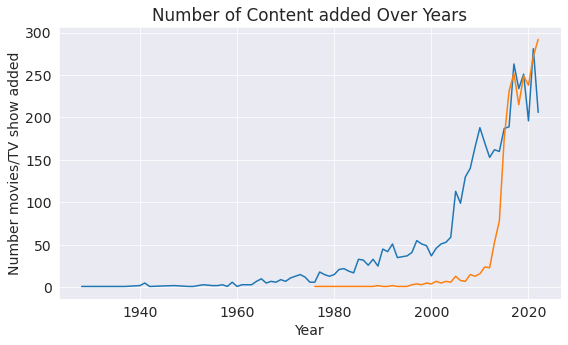

In [44]:
plt.title("Number of Content added Over Years")
plt.xlabel("Year")
plt.ylabel("Number movies/TV show added")
sns.lineplot(x=movie_count.index ,y= movie_count.values)
sns.lineplot(x=tv_count.index ,y= tv_count.values);

**3. -- Age rating**

Now we are going to see the Number content according to Age Rating.

In [45]:
a = hotstar_new_df.age_rating.value_counts()
a

U/A 13+    2856
U          1253
U/A 16+    1134
U/A 7+     1098
A           310
G             1
Name: age_rating, dtype: int64

We found 7 common age rating from the dataset

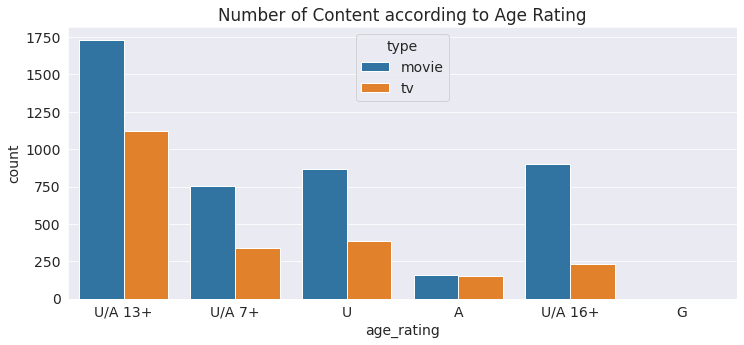

In [46]:
plt.figure(figsize=(12,5))
plt.title("Number of Content according to Age Rating")#Plotting the values obtained above
sns.countplot(x=hotstar_df['age_rating'],hue=hotstar_df['type']);

In `U/A 13+` - around 1750 are Movies and around 1100 are TV Shows

In `U/A 13+` - around 750 are Movies and around 300 are TV Shows

In `U/A 13+` - around 850 are Movies and around 350 are TV Shows

In `U/A 13+` - both Movies and TV Shows are around 150

In `U/A 13+` - around 900 are Movies and around very less than 250 are TV Shows

**4. - Longest Movies**

let's see the top 10 Longest Movies on Hotstar.

In [61]:
maximum = hotstar_new_df.nlargest(10, ['running_time'])

In [62]:
maximum


,hotstar_id,title,genre,year,age_rating,running_time,seasons,episodes,type
1233,1260117918,Daana Veera Soora Karna,Fantasy,1977,U,226.0,0.0,0.0,movie
3173,1000108860,Dubai,Thriller,2001,U/A 16+,199.0,0.0,0.0,movie
539,1770001166,Titanic,Historical,1997,U/A 13+,194.0,0.0,0.0,movie
427,1000101168,Kerala Varma Pazhassiraja,Action,2009,U/A 13+,190.0,0.0,0.0,movie
2857,1260096368,The 2021 Rock & Roll Hall of Fame Induction Ce...,Musical,2021,U/A 16+,188.0,0.0,0.0,movie
2832,1260117075,Lajja,Drama,2001,U/A 16+,186.0,0.0,0.0,movie
2706,1000064726,Mallannaa,Drama,2009,U/A 13+,183.0,0.0,0.0,movie
432,1000192007,Nayak,Drama,2001,U/A 13+,182.0,0.0,0.0,movie
2661,1000036276,The King & The Commissioner,Action,2011,U/A 16+,182.0,0.0,0.0,movie
2748,1000101218,23rd March 1931 Shaheed,Drama,2002,U,182.0,0.0,0.0,movie


In [63]:
maximum.set_index('running_time',inplace=True)


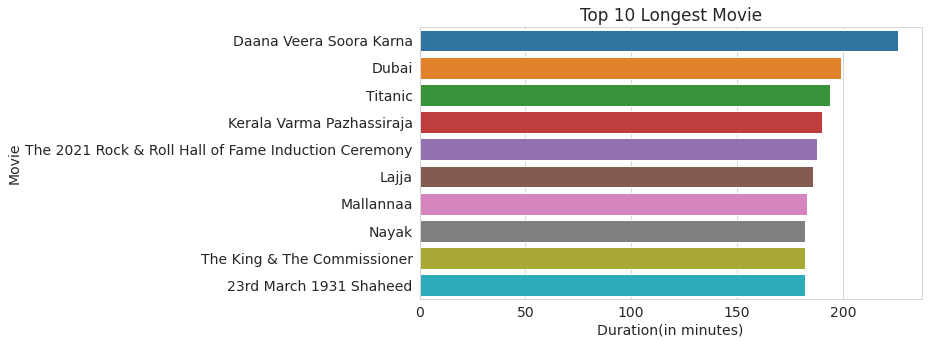

In [64]:
sns.set_style("whitegrid")
plt.title("Top 10 Longest Movie")
sns.barplot(x=maximum.index,y=maximum.title)
plt.xlabel("Duration(in minutes)");
plt.ylabel("Movie");

In the upper visualization we found that `Daana Veera Soora Karna` is the Longest Movie on Hotstar and `Dubai` contains second position and `Titanic` contains third position in Longest movies list on Hotstar

**5. - Episodes of Tv Shows**

we are going to see Number Episodes of TV Shows on Hotstar

In [65]:
maximum_2 = hotstar_new_df.nlargest(10, ['episodes'])
maximum_2

,hotstar_id,title,genre,year,age_rating,running_time,seasons,episodes,type
5108,586,Yeh Rishta Kya Kehlata Hai,Drama,2009,U/A 13+,0.0,67.0,3871.0,tv
4841,693,Saath Nibhaana Saathiya 2,Family,2010,U/A 13+,0.0,3.0,2732.0,tv
4868,363,Savdhaan India,Crime,2012,U/A 16+,0.0,73.0,2348.0,tv
4896,960,Pudhcha Paaul,Family,2011,U/A 13+,0.0,45.0,1943.0,tv
6414,3,Yeh Hai Mohabbatein,Romance,2013,U/A 13+,0.0,43.0,1895.0,tv
6200,655,Kyunki Saas Bhi Kabhi Bahu Thi,Family,2000,U/A 13+,0.0,38.0,1833.0,tv
5360,1916,Amruthavarshini - 2012,Romance,2012,U/A 13+,0.0,43.0,1713.0,tv
5106,9901,Kumkuma Puvvu,Drama,2016,U/A 13+,0.0,8.0,1702.0,tv
4619,1586,Parasparam,Family,2013,U/A 13+,0.0,34.0,1524.0,tv
6119,9903,Ke Apon Ke Por,Family,2016,U/A 13+,0.0,11.0,1507.0,tv


In [66]:
maximum_2.set_index('episodes',inplace=True)

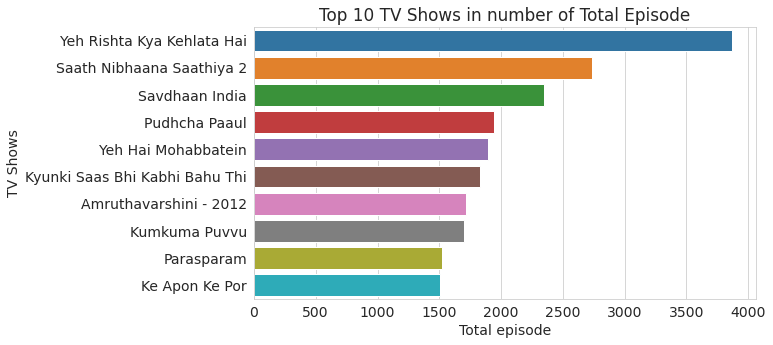

In [67]:
sns.set_style("whitegrid")
plt.title("Top 10 TV Shows in number of Total Episode")
sns.barplot(x=maximum_2.index,y=maximum_2.title)
plt.xlabel("Total episode");
plt.ylabel("TV Shows");

We found that `Yeh Rishta Kya Kehlata Hai` has the highest number of episodes 

Let us save and upload our work to Jovian before continuing

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vinayakpandey372/hotstar-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vinayakpandey372/hotstar-data-analysis


'https://jovian.ai/vinayakpandey372/hotstar-data-analysis'

## Asking and Answering Questions

Let's Ask the Question from the datasets

Now we are going to ask the right question which give us more information about the datasets.
**Question**
1. Which Tv SHows is Highest number of Seasons.
2. Which Age Rating is Highest Number of Movie and TV Shows.
3. Which is the highest Number of Movies according to Genre
4. What is the percentage of Top 10 Tv Genre.
5. How many content added on Hotstar in Last 10 years.

#### Q1: Which TV Shows contains Highest Number of seasons

In [60]:
maximum_season = hotstar_new_df.nlargest(10, ['seasons'])

In [61]:
maximum_season

,hotstar_id,title,genre,year,age_rating,running_time,seasons,episodes,type
4868,363,Savdhaan India,Crime,2012,U/A 16+,0.0,73.0,2348.0,tv
5108,586,Yeh Rishta Kya Kehlata Hai,Drama,2009,U/A 13+,0.0,67.0,3871.0,tv
4966,1298,Lakshya,Crime,2011,U/A 13+,0.0,53.0,1226.0,tv
4896,960,Pudhcha Paaul,Family,2011,U/A 13+,0.0,45.0,1943.0,tv
5360,1916,Amruthavarshini - 2012,Romance,2012,U/A 13+,0.0,43.0,1713.0,tv
6414,3,Yeh Hai Mohabbatein,Romance,2013,U/A 13+,0.0,43.0,1895.0,tv
6200,655,Kyunki Saas Bhi Kabhi Bahu Thi,Family,2000,U/A 13+,0.0,38.0,1833.0,tv
5814,12,Devon Ke Dev... Mahadev,Mythology,2011,U/A 13+,0.0,36.0,820.0,tv
4812,119,Sadda Haq - My Life My Choice,Drama,2013,U/A 13+,0.0,35.0,676.0,tv
4619,1586,Parasparam,Family,2013,U/A 13+,0.0,34.0,1524.0,tv


In [63]:
maximum_season.set_index('seasons',inplace=True)

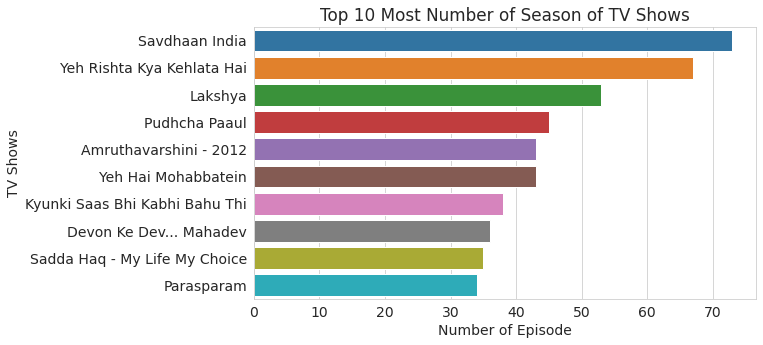

In [66]:
sns.set_style("whitegrid")
plt.title("Top 10 Most Number of Season of TV Shows")
sns.barplot(x=maximum_season.index,y=maximum_season.title)
plt.xlabel("Number of Episode");
plt.ylabel("TV Shows");

From dataset we found that `Savdhaan India` TV Shows has the highest Number of Seasons
There are around 74 Seasons of `Savdhaan India`

#### Q2: - Which Age Rating is Highest Number of Movie and TV Shows.

In [68]:
hotstar_new_df.age_rating.unique()

array(['U/A 13+', 'U/A 7+', 'U', 'A', 'U/A 16+', 'G'], dtype=object)

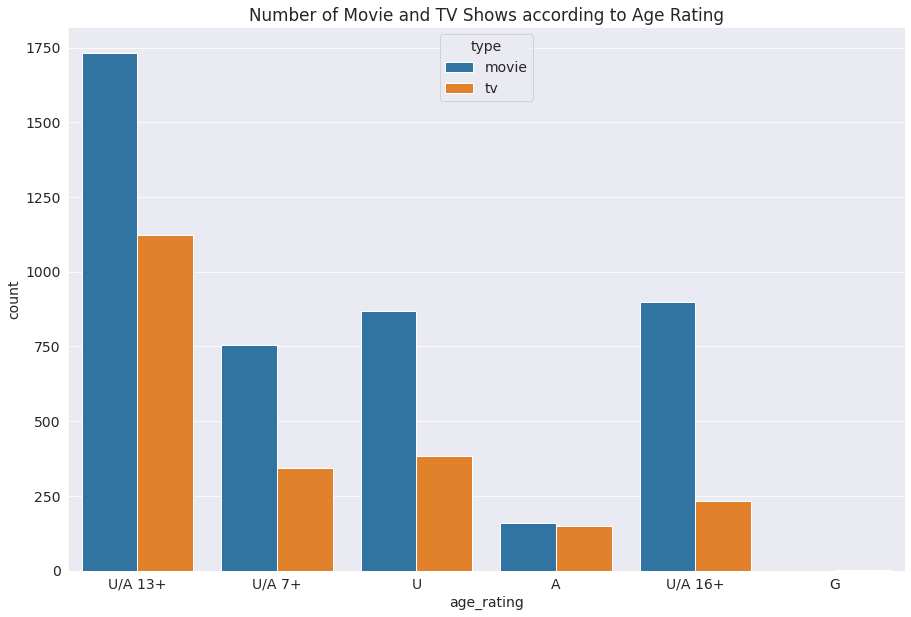

In [58]:
plt.figure(figsize=(15,10))
plt.title("Number of Movie and TV Shows according to Age Rating")
sns.countplot(x=hotstar_new_df['age_rating'],hue=hotstar_new_df['type']);

Here from dataset we found that in `U/A 13+` genre contains Highest Number of Movies and TV Shows

#### Q3: Which is the highest Number of Movies according to Genre

In [71]:
hotstar_new_df.genre.unique()

array(['Action', 'Drama', 'Romance', 'Historical', 'Comedy', 'Teen',
       'Adventure', 'Mythology', 'Animation', 'Thriller', 'Horror',
       'Superhero', 'Crime', 'Family', 'Mystery', 'Science',
       'Animals & Nature', 'Documentary', 'Standup Comedy', 'Musical',
       'Kids', 'Science Fiction', 'Biopic', 'Concert Film', 'Food',
       'Sport', 'Fantasy', 'Shorts', 'Reality', 'Docudrama', 'Travel',
       'Talk Show', 'Awards', 'Lifestyle', 'Kabaddi', 'Football'],
      dtype=object)

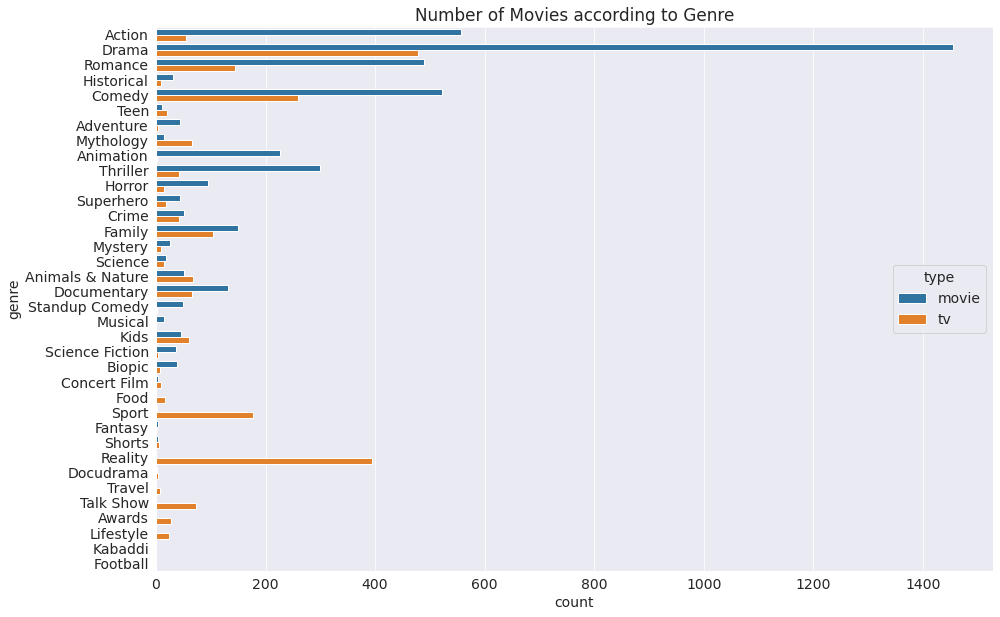

In [57]:
plt.figure(figsize=(15,10))
plt.title("Number of Movies according to Genre")
sns.countplot(y=hotstar_new_df['genre'],hue=hotstar_new_df['type']);

Highest Number of Movies are in `Drama` genre. Around 1500 Movies are from `Drama` genre

### Q4: What is the percentage of Top 10 Tv Genre.

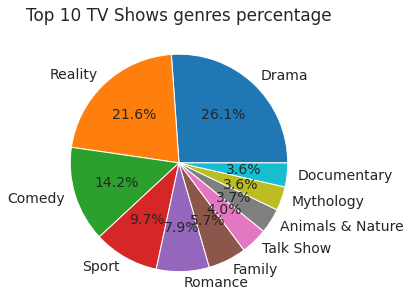

In [84]:
genre = hotstar_new_df['type']=='tv'
kgf=hotstar_new_df[genre]

genre_1=kgf['genre'].value_counts()[:10]
genre_1=pd.DataFrame(genre_1)

genre_1.reset_index(drop=False,inplace=True)
count=genre_1['genre']
labels=genre_1['index']

plt.title("Top 10 TV Shows genres percentage")
plt.pie(count,labels=labels,autopct='%1.1f%%')
plt.show()

Here we visualized the Top 10 TV Shows genre as percentage

#### Q5: How many content added on Hotstar in Last 10 years.

In [51]:
movie_count = hotstar_new_df.year.value_counts().head(10);
tv_count = hotstar_new_df.year.value_counts().head(10);

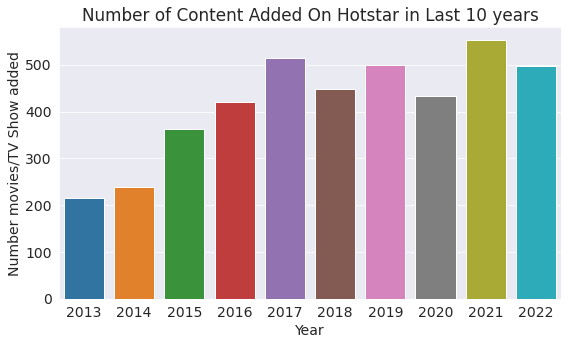

In [53]:
plt.title("Number of Content Added On Hotstar in Last 10 years")
plt.xlabel("Year")
plt.ylabel("Number movies/TV Show added")
sns.barplot(x=movie_count.index ,y= movie_count.values)
sns.barplot(x=tv_count.index ,y= tv_count.values);

Here we visualize the content added on Hotstar in past 10 years

Let us save and upload our work to Jovian before continuing.

In [59]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion

We've drawn many inferences from the Dataset .Here a summary of that:
- we downloaded the kaggle dataset with `opendataset` a python library which is used to download dataset online.
- And then we clean and handle the missing values from dataset.
- After that we analyze our data which give us more information about data.
- As Movies and TV Shows are constantly releasing and being uploading on Hotstar. We are analyzing the dataset in November so it might be more Movies and TV Shows at end of this Year.





In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vinayakpandey372/hotstar-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vinayakpandey372/hotstar-data-analysis


'https://jovian.ai/vinayakpandey372/hotstar-data-analysis'

## References and Future Work

- In Future we can compare the data from another datasets from another datasets which provide insights that how many movies and TV Shows added every year


* https://www.kaggle.com/datasets/goelyash/disney-hotstar-tv-and-movie-catalog/code(link to the dataset)
* Numerical computing with Numpy: https://jovian.ml/aakashns/python-numerical-computing-with-numpy
* Analyzing tabular data with Pandas: https://jovian.ml/aakashns/python-pandas-data-analysis
* Matplotlib & Seaborn tutorial: https://jovian.ml/aakashns/python-matplotlib-data-visualization
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [81]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vinayakpandey372/hotstar-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/vinayakpandey372/hotstar-data-analysis


'https://jovian.ai/vinayakpandey372/hotstar-data-analysis'